Перечень заданий: 

1. Провести описательную статистику данных. 

2. Вычислить коэффициенты корреляции для каждых факторов. 

3. Построить тепловую карту корреляции.

4. Построить матрицу рассеяния. 

5. Для указанных наборов данных провести реализацию метода главных компонент. 

6. Для указанных наборов данных провести факторный анализ данных. 

7. Провести кластеризацию данных методом k-средних. 

8. Провести иерархическую кластеризацию данных  

9. Провести описание, анализ и визуализацию данных. 

10. Провести кластерный анализ, построить дендограмму. 

11. Провести регрессионный анализ данных. 

12. Провести дискриминантный анализ данных.

# Полянчиков Владислав АБД19-1м Экзамен

In [52]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns

## Задания 1, 2, 7; Датасет 11

In [18]:
df = pd.read_csv('ebola_2014_2016_clean.csv')
df.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


## Задание 1. Провести описательную статистику данных

Датасет 11 содержит данные по болезни, бывшей еще не так давно очень популярной, Эбола. Данные собраны за период с 29 августа 2014 года по 23 марта 2016 года и содержит данные по 10 странам. В таблице есть данные по подозрительным, возможным и подтвержденным случаям и их сумме, а также по подозрительным, возможным и подтвержденным смертям и их сумме, естественно, в результате данной болезни. Итого: 10 колонок.

Дубликатов нет. Имеются пропущенные значения. Больше всего - в колонках со смертями.

In [51]:
df.Date.unique()[0], df.Date.unique()[-1]

('2014-08-29', '2016-03-23')

In [19]:
df.shape

(2485, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          2485 non-null   object 
 1   Date                                             2485 non-null   object 
 2   No. of suspected cases                           2366 non-null   float64
 3   No. of probable cases                            2436 non-null   float64
 4   No. of confirmed cases                           2484 non-null   float64
 5   No. of confirmed, probable and suspected cases   2477 non-null   float64
 6   No. of suspected deaths                          1308 non-null   float64
 7   No. of probable deaths                           1526 non-null   float64
 8   No. of confirmed deaths                          1648 non-null   float64
 9   No. of confirmed, probable and

In [21]:
df.isna().sum()

Country                                               0
Date                                                  0
No. of suspected cases                              119
No. of probable cases                                49
No. of confirmed cases                                1
No. of confirmed, probable and suspected cases        8
No. of suspected deaths                            1177
No. of probable deaths                              959
No. of confirmed deaths                             837
No. of confirmed, probable and suspected deaths       0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [28]:
df.describe(include=['object'])

,Country,Date
count,2485,2485
unique,10,259
top,Liberia,2016-03-23
freq,365,12


In [34]:
round(df.describe(), 1)

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2366.0,2436.0,2484.0,2477.0,1308.0,1526.0,1648.0,2485.0
mean,891.8,263.7,1436.6,2553.7,32.9,104.5,781.7,1028.3
std,1828.7,561.5,2574.2,4427.1,73.2,161.4,1258.1,1656.1
min,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,7.0,8.0,0.0,1.0,2.0,6.0
75%,17.0,287.0,3118.0,3657.0,0.0,208.0,1760.8,2386.0
max,5636.0,2106.0,8704.0,14122.0,661.0,803.0,3858.0,4806.0


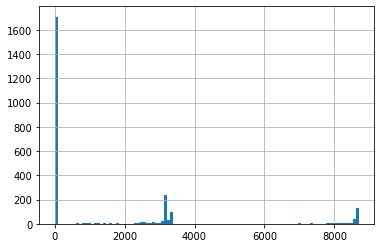

In [140]:
df['No. of confirmed cases'].hist(bins=100)

In [30]:
df.Country.value_counts()

Liberia                     365
Guinea                      259
Sierra Leone                259
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Name: Country, dtype: int64

In [55]:
len(df.Country.unique())

10

## Задание 2. Вычислить коэффициенты корреляции для каждых факторов.

В общем и целом, факторы имеют друг с другом очень сильную связь (особенно фактор подтвержденных смертей)

In [36]:
round(df.corr(), 2)

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
No. of suspected cases,1.00,0.79,0.72,0.93,0.80,0.28,0.84,0.90
No. of probable cases,0.79,1.00,0.38,0.67,0.92,0.92,0.65,0.81
No. of confirmed cases,0.72,0.38,1.00,0.93,0.80,0.58,0.97,0.84
"No. of confirmed, probable and suspected cases",0.93,0.67,0.93,1.00,0.82,0.53,0.96,0.96
No. of suspected deaths,0.80,0.92,0.80,0.82,1.00,0.92,0.81,0.85
No. of probable deaths,0.28,0.92,0.58,0.53,0.92,1.00,0.72,0.77
No. of confirmed deaths,0.84,0.65,0.97,0.96,0.81,0.72,1.00,1.00
"No. of confirmed, probable and suspected deaths",0.90,0.81,0.84,0.96,0.85,0.77,1.00,1.00


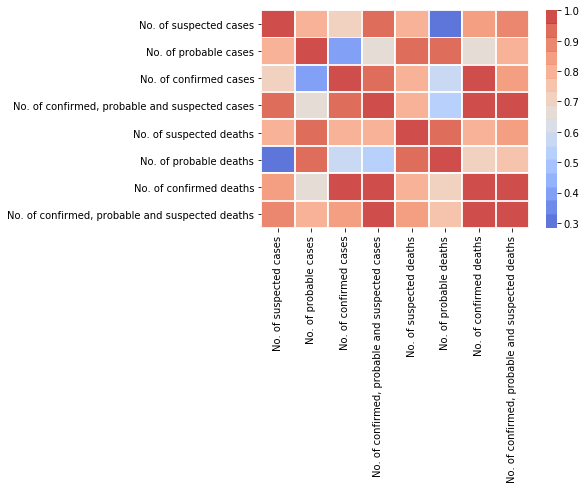

In [41]:
sns.heatmap(df.corr(), cmap=sns.color_palette('coolwarm', 16), alpha=0.9, linewidths=0.9)

## Задание 7. Провести кластеризацию данных методом k-средних.

Сначала необходимо заполнить пропущенные значения

In [105]:
clust_df = df.copy()

In [106]:
clust_df.isna().sum()

Country                                               0
Date                                                  0
No. of suspected cases                              119
No. of probable cases                                49
No. of confirmed cases                                1
No. of confirmed, probable and suspected cases        8
No. of suspected deaths                            1177
No. of probable deaths                              959
No. of confirmed deaths                             837
No. of confirmed, probable and suspected deaths       0
dtype: int64

In [107]:
clust_df.fillna(-1, inplace=True)

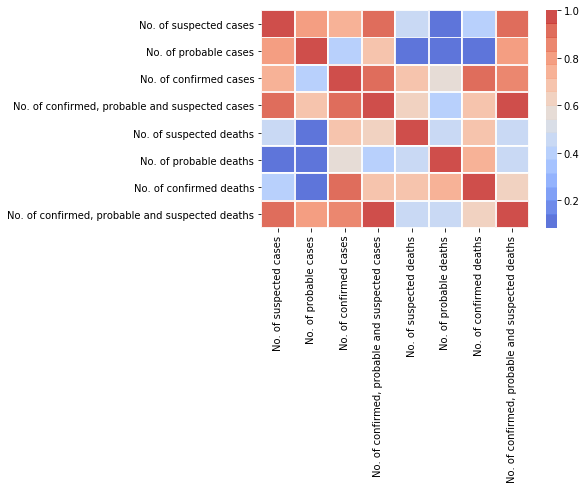

In [108]:
clust_df.corr()
sns.heatmap(clust_df.corr(), cmap=sns.color_palette('coolwarm', 16), alpha=0.9, linewidths=0.9)

Как можно заметить, связь между факторами ухудшилась. То же самое было бы, если заполнять медианным значением. К счастью, есть иной способ, как это можно оптимизировать

In [109]:
clust_df.describe()

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,849.085714,258.513481,1436.037827,2545.454326,16.843058,63.807646,518.045070,1028.347686
std,1794.518097,557.135896,2573.844159,4422.352812,55.707674,136.518740,1089.211448,1656.064372
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,1.000000,7.000000,8.000000,0.000000,0.000000,0.000000,6.000000
75%,13.000000,287.000000,3118.000000,3652.000000,0.000000,1.000000,7.000000,2386.000000
max,5636.000000,2106.000000,8704.000000,14122.000000,661.000000,803.000000,3858.000000,4806.000000


In [110]:
for i in range(len(clust_df)):
    if clust_df.loc[i, 'No. of suspected deaths'] == -1:
        clust_df.loc[i, 'No. of suspected deaths'] = clust_df.loc[i, 'No. of confirmed, probable and suspected deaths'] * 0.05
    if clust_df.loc[i, 'No. of probable deaths'] == -1:
        clust_df.loc[i, 'No. of probable deaths'] = clust_df.loc[i, 'No. of confirmed, probable and suspected deaths'] * 0.15
    if clust_df.loc[i, 'No. of confirmed deaths'] == -1:
        clust_df.loc[i, 'No. of confirmed deaths'] = clust_df.loc[i, 'No. of confirmed, probable and suspected deaths'] * 0.8
        
    if clust_df.loc[i, 'No. of suspected cases'] == -1:
        clust_df.loc[i, 'No. of suspected cases'] = clust_df.loc[i, 'No. of confirmed, probable and suspected deaths'] * 0.05
    if clust_df.loc[i, 'No. of probable cases'] == -1:
        clust_df.loc[i, 'No. of probable cases'] = clust_df.loc[i, 'No. of confirmed, probable and suspected deaths'] * 0.15
    if clust_df.loc[i, 'No. of confirmed cases'] == -1:
        clust_df.loc[i, 'No. of confirmed cases'] = clust_df.loc[i, 'No. of confirmed, probable and suspected deaths'] * 0.8

In [111]:
clust_df.describe()

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,849.187988,258.688270,1436.837907,2545.454326,49.425573,129.400885,861.146640,1028.347686
std,1794.471400,557.104875,2573.706288,4422.352812,83.892286,222.778364,1392.856664,1656.064372
min,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,7.000000,8.000000,0.000000,0.900000,4.800000,6.000000
75%,13.000000,287.000000,3118.000000,3652.000000,120.600000,208.000000,1962.000000,2386.000000
max,5636.000000,2106.000000,8704.000000,14122.000000,661.000000,803.000000,3858.000000,4806.000000


In [112]:
clust_df.set_index(['Country', 'Date'], inplace=True)

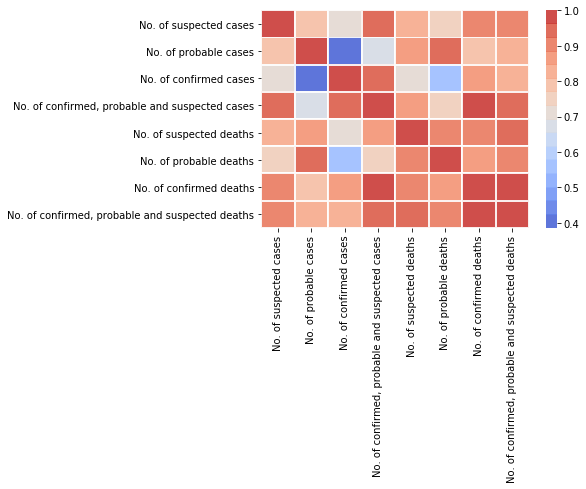

In [113]:
clust_df.corr()
sns.heatmap(clust_df.corr(), cmap=sns.color_palette('coolwarm', 16), alpha=0.9, linewidths=0.9)

Видим, что связь между факторами стала даже лучше, чем была изначально

In [114]:
clust_df.head(1)

,,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
Country,Date,,,,,,,,
Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import time

In [116]:
sc = StandardScaler()

In [125]:
def kmeans_analysis(df, step):
    
    columns = df.columns
    df_scaled = sc.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns = columns)
    
    if step==0:
        print('query: showing rows of scaled DataFrame')
        return df_scaled.sample(5)
    
    if step==1:
        print('query: correlation')
        return df_scaled.corr()
    
    if step==2:
        print('query: returning Elbow Method')
        K = range(1, 11)
        models = [KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in K]
        dist = [model.inertia_ for model in models]

        # Plot the elbow
        plt.plot(K, dist, marker='o')
        plt.xlabel('k')
        plt.ylabel('Sum of distances')
        plt.title('The Elbow Method showing the optimal k')
        return plt.show()
    
    a = int(input('Choose the amount of clusters, please: '))
    model = KMeans(n_clusters = a, random_state=42)
    model.fit(df)
    df_scaled['cluster'] = model.labels_
    df['cluster'] = model.labels_
    
    if step==3:
        print('n_clusters:', a)
        print("query: df.groupby('cluster').mean()")
        return df.groupby('cluster').mean()
    
    if step==4:
        print('n_clusters:', a)
        print("query: df_scaled.groupby('cluster').size()")
        return df_scaled.groupby('cluster').size()
    
    if step==5:
        print('n_clusters:', a)
        print("query: df_scaled['cluster'].sort_values()")
        return df_scaled['cluster'].sort_values()
    
    fig, axs = plt.subplots(nrows=int(a/2 + 0.5), ncols=2, sharex=True)
    fig.set_size_inches(16, len(df_scaled.columns) + 2)
    plt.subplots_adjust( wspace=0.625)
    k = 0
    c = ['grey', 'violet', 'salmon', 'skyblue', 'orange', 'red', 'yellow', 'blue', 'green', 'black']
    
    if step==6:
        for i in range(int(a/2 + 0.5)):
            for j in range(2):
                try:
                    ax = axs[i, j]
                    k += 1
                    df_scaled[df_scaled.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
                    ax.tick_params(labelsize = 11)
                except TypeError:
                    break
        
        return plt.show()

In [118]:
kmeans_analysis(clust_df, 0)

query: showing rows of scaled DataFrame


,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
2092,-0.473320,-0.464437,-0.558000,-0.575478,-0.589274,-0.580967,-0.618384,-0.621084
2298,-0.473320,-0.464437,-0.556834,-0.574799,-0.589274,-0.580967,-0.617666,-0.620480
715,-0.473320,-0.464437,-0.558000,-0.575478,-0.589274,-0.580967,-0.618384,-0.621084
5,-0.471648,-0.462642,-0.551393,-0.570728,-0.589274,-0.576478,-0.613357,-0.616252
1375,-0.473320,-0.462642,-0.551004,-0.571181,-0.589274,-0.576478,-0.613357,-0.616252


In [119]:
kmeans_analysis(clust_df, 1)

query: correlation


,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
No. of suspected cases,1.000000,0.793709,0.726149,0.928307,0.836255,0.741672,0.903800,0.903970
No. of probable cases,0.793709,1.000000,0.385781,0.672591,0.853663,0.924836,0.770118,0.811353
No. of confirmed cases,0.726149,0.385781,1.000000,0.925297,0.724418,0.541927,0.869559,0.836237
"No. of confirmed, probable and suspected cases",0.928307,0.672591,0.925297,1.000000,0.868626,0.733028,0.969967,0.955848
No. of suspected deaths,0.836255,0.853663,0.724418,0.868626,1.000000,0.917681,0.918628,0.940220
No. of probable deaths,0.741672,0.924836,0.541927,0.733028,0.917681,1.000000,0.860720,0.895146
No. of confirmed deaths,0.903800,0.770118,0.869559,0.969967,0.918628,0.860720,1.000000,0.996810
"No. of confirmed, probable and suspected deaths",0.903970,0.811353,0.836237,0.955848,0.940220,0.895146,0.996810,1.000000


query: returning Elbow Method


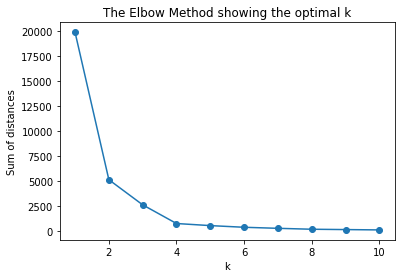

In [120]:
kmeans_analysis(clust_df, 2)

In [121]:
kmeans_analysis(clust_df, 3)

Choose the amount of clusters, please: 4
n_clusters: 4
query: df.groupby('cluster').mean()


,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
cluster,,,,,,,,
0,2.358754,4.623278,25.970149,32.911596,0.723278,3.423794,12.382204,16.504018
1,5008.529661,1868.673729,3134.974576,10012.161017,223.038983,669.116949,3581.620339,4460.779661
2,3816.747826,285.191304,8472.291304,12574.856522,156.930435,207.704348,3372.886957,3737.521739
3,166.997112,462.763899,3021.015162,3657.166065,118.524910,396.799097,1795.498917,2217.761733


In [139]:
kmeans_analysis(clust_df, 4)

Choose the amount of clusters, please: 4
n_clusters: 4
query: df_scaled.groupby('cluster').size()


cluster
0    1742
1     236
2     230
3     277
dtype: int64

In [123]:
kmeans_analysis(clust_df, 5)

Choose the amount of clusters, please: 4
n_clusters: 4
query: df_scaled['cluster'].sort_values()


0       0
1541    0
1540    0
1539    0
1536    0
       ..
2169    3
1704    3
1422    3
571     3
523     3
Name: cluster, Length: 2485, dtype: int32

Choose the amount of clusters, please: 4


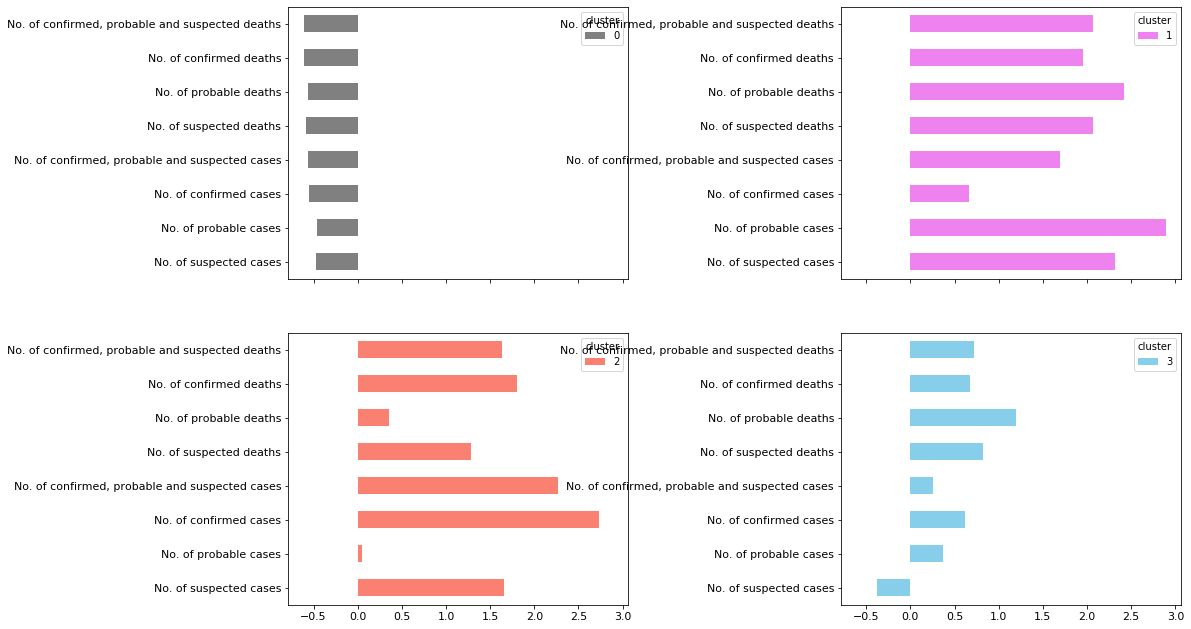

In [130]:
kmeans_analysis(clust_df, 6)

Выводы по кластерному анализу. Оптимальное количество кластеров - 4.
В первую группу входят случаи, где не было ничего зафиксировано (или же значения, оставшиеся -1), во второй группе идет упор на возможные смерти и случаи заболевания, при этом подтвержденных случаев было мало.
Обратная ситуация идет с третьим кластером - там никаких возможных случаев и смертей не было, зато было много подтвержденных.
4 кластер - оставшаяся группа, где не выводилось никаких подозрительных случаев.